In [110]:
##importing necessary modules
import matplotlib ##import for python plotting and viz library
import matplotlib.pyplot as plt
import rasterio ##import rasterio for reading geospatial formats
from rasterio import plot
from rasterio.plot import show, show_hist
import os ##importing os for setting working directory
import numpy as np
import shapely
import earthpy.plot as ep
from glob import glob
from scipy.io import loadmat
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon
from descartes import PolygonPatch # this is a helpful library for plotting shapely shapes in matplotlib
import fiona ##for shapefile ground truth data
%matplotlib inline 

In [69]:
#checking working directory
os.getcwd()

'/Users/Dora'

In [70]:
##importing image
##adding all file paths to a list
s2_bands = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B01_(Raw).tiff", 
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B02_(Raw).tiff", 
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B03_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B04_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B05_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B06_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B07_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B08_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B09_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B11_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B12_(Raw).tiff"]

##adding only true colour file paths to a list
true_colour_bands = ["/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B02_(Raw).tiff", 
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B03_(Raw).tiff",
        "/Users/Dora/Documents/Data Science Ryerson/Final Capstone/Sentinel bands/R170m/2021-08-24-00:00_2021-08-24-23:59_Sentinel-2_L2A_B04_(Raw).tiff"]

##open these files and add all bands to an full array
arrs = []
for band in s2_bands:
    with rasterio.open(band) as f:
        arrs.append(f.read(1))
        
##adding true colour bands to a true colour array
arrs_true_colour = []
for band in true_colour_bands:
    with rasterio.open(band) as f:
        arrs_true_colour.append(f.read(1))

##convert the lists to numpy arrays
all_bands_img = np.array(arrs, dtype=arrs[0].dtype)
true_colour_img = np.array(arrs_true_colour, dtype=arrs_true_colour[0].dtype)

##let's check the shape of these arrays
print(all_bands_img.shape)
print(true_colour_img.shape)

true_colour_img

(11, 1459, 2500)
(3, 1459, 2500)


array([[[ 0,  0,  0, ...,  7,  7,  7],
        [ 0,  0,  0, ...,  7,  7,  7],
        [ 0,  0,  0, ...,  7,  8,  7],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ..., 11, 11, 11],
        [ 0,  0,  0, ..., 12, 11, 12],
        [ 0,  0,  0, ..., 11, 12, 12],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  6,  6,  6],
        [ 0,  0,  0, ...,  6,  7,  6],
        [ 0,  0,  0, ...,  7,  9,  8],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]], dtype=uint8)

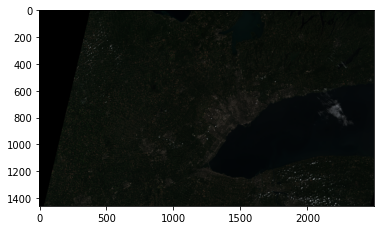

<AxesSubplot:>

In [100]:
##visualizing RGB bands method 1
show(true_colour_img[[2,1,0], :, :])

"the bands are very dark, we can fix this using method 2 below"

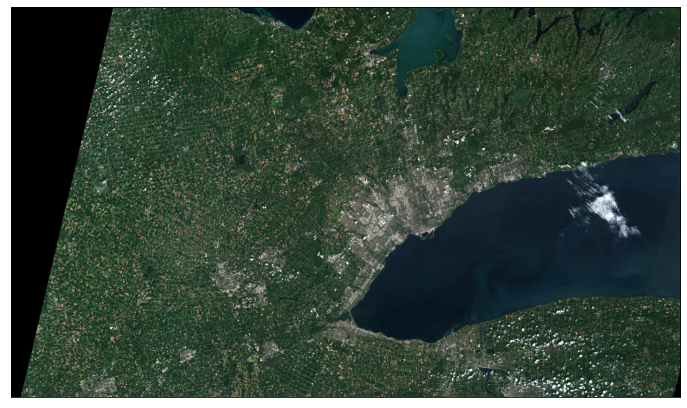

In [116]:
##visualizing rgb bands method 2 to show with better contrast

"composite images can be dark if pixel brightness values\
are skewed towards value of zero. this can be solved by\
stretching the pixel brightness values in a image\
using the argument stretch=true to extend the values\
to the full 0-255 range of potential values to increase \
the visual contrast of the image. The str_clip argument\
allows to specify how much of the tails of the data you want\
to clip off. the larger the nr the more the data will be\
stretched or brightened"

ep.plot_rgb(
    true_colour_img,
    rgb=(2, 1, 0),
    stretch=True,
    str_clip=0.50,
    figsize=(12, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

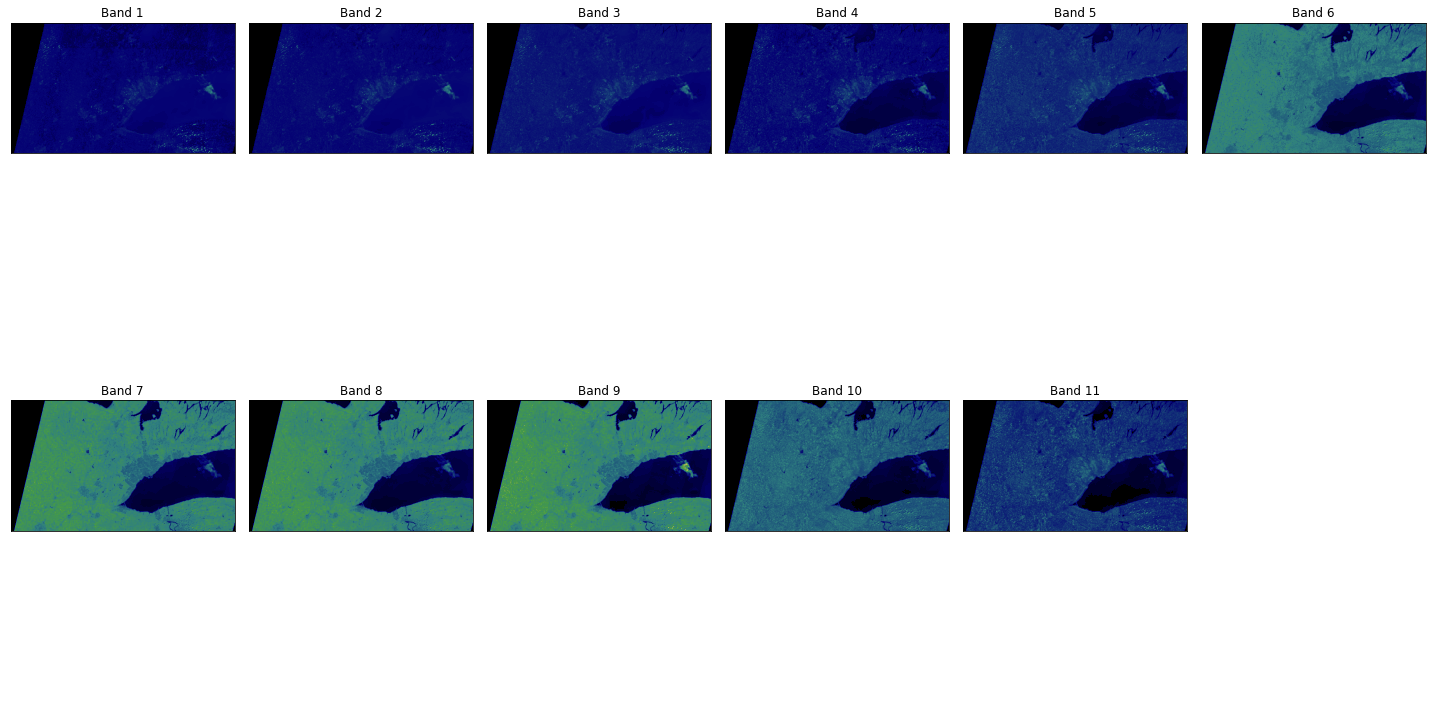

In [118]:
##using earhpy to visualize each band 
ep.plot_bands(all_bands_img,
             cmap = 'gist_earth',
             figsize = (20,12),
             cols = 6,
             cbar = False)
plt.show()

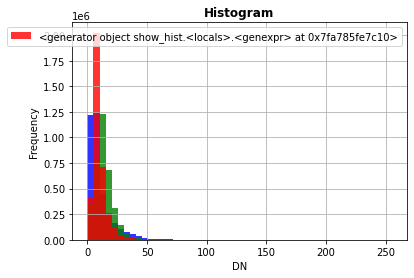

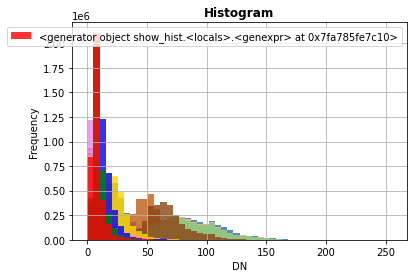

In [95]:
##plotting histograms
rasterio.plot.show_hist(true_colour_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.8) ##true colour histogram
rasterio.plot.show_hist(all_bands_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.8) ##all bands histogram

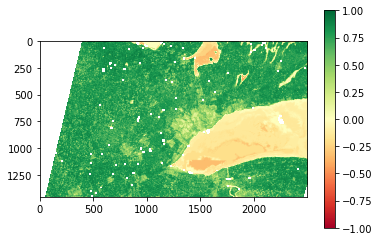

In [87]:
##calculating NVDI to check if bands work as expected
##just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

bandNIR = all_bands_img[7] # NIR band
bandRed = all_bands_img[3] # RED band

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR.astype(float)+bandRed.astype(float))

##plotting NDVI
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

##we see a lot of green for vegetation and yellow for water, so it seems correct

In [89]:
##flattening bands to be able to plot them against each other
print('Array shape before: {shp} (size is {sz})'.format(shp=bandRed.shape, sz=bandRed.size))

red_flat = np.ndarray.flatten(bandRed)
nir_flat = np.ndarray.flatten(bandNIR)

print('Array shape after: {shp} (size is {sz})'.format(shp=red_flat.shape, sz=red_flat.size))

##the red and NIR bands are now flattened into one dimension

Array shape before: (1459, 2500) (size is 3647500)
Array shape after: (3647500,) (size is 3647500)


Text(0, 0.5, 'NIR label')

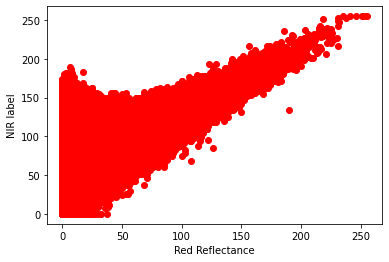

In [91]:
##plotting NIR and red band 
fig, ax = plt.subplots()

# Make the plot
ax.scatter(red_flat, nir_flat, color='r', marker='o')

# Add some axis labels
ax.set_xlabel('Red Reflectance')
ax.set_ylabel('NIR label')

In [ ]:
##importing shapefile for ground truth data
